In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV 

from scipy.stats import randint
from scipy.stats import expon, loguniform
from scipy.stats import uniform
from sklearn.neighbors import BallTree, KDTree

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

In [36]:
dataset = pd.read_csv("/Users/zeinebtekaya/Desktop/IIA 4/student_exam_data.csv")
dataset.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [4]:
dataset.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


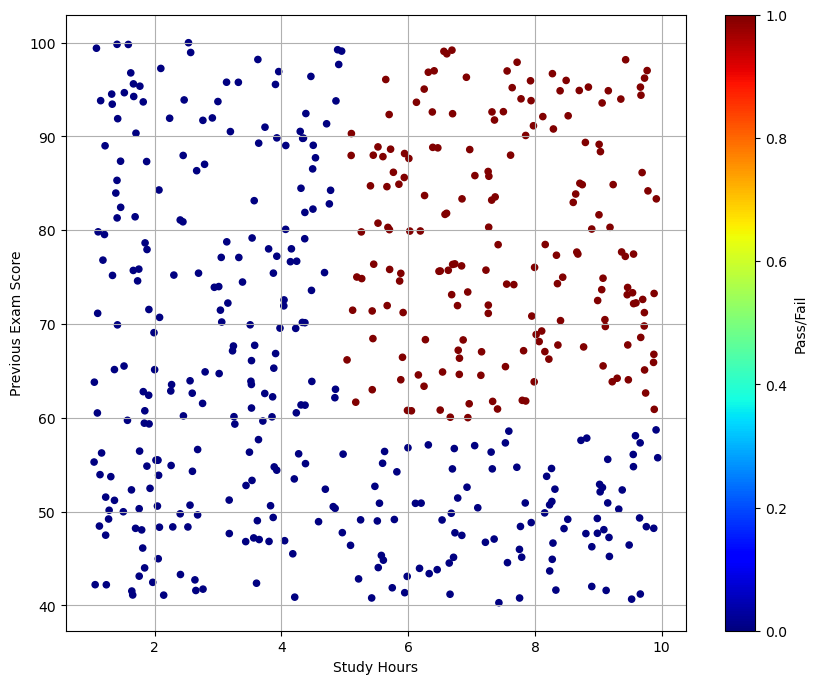

In [8]:
dataset.plot(kind="scatter", x="Study Hours", y="Previous Exam Score", grid=True,
             c="Pass/Fail", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10,8))
plt.show()

In [10]:
corr_matrix = dataset.corr()
corr_matrix["Pass/Fail"].sort_values(ascending=False)

Pass/Fail              1.000000
Study Hours            0.583505
Previous Exam Score    0.443706
Name: Pass/Fail, dtype: float64

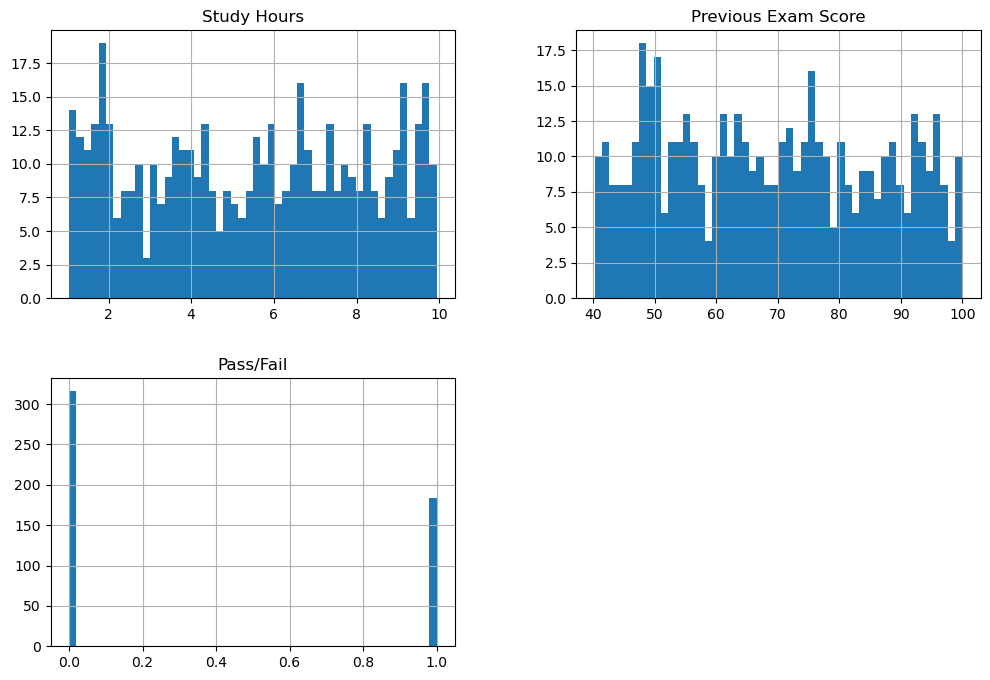

In [12]:
dataset.hist(bins= 50, figsize=(12,8))
plt.show()

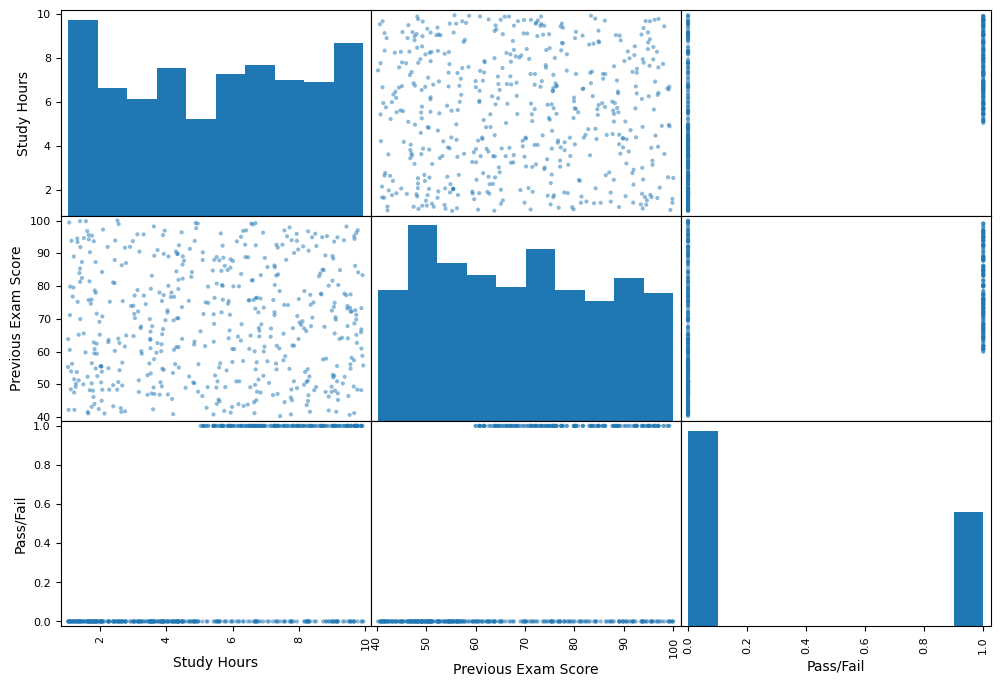

In [16]:
attributes = ["Study Hours", "Previous Exam Score","Pass/Fail"]
scatter_matrix(dataset[attributes], figsize=(12, 8)) 
plt.show()

In [18]:
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=0)

In [19]:
print(train_set.shape)
test_set.shape

(400, 3)


(100, 3)

In [20]:
X_train = train_set.drop("Pass/Fail", axis=1)
y_train = train_set["Pass/Fail"].copy()

In [25]:
preprocessing = make_pipeline(
  (StandardScaler()),
)

In [32]:
preprocessing.fit_transform(X_train)

array([[ 8.51904691e-01, -4.21616749e-01],
       [ 1.18567563e+00,  1.50258518e+00],
       [-1.00833476e+00,  1.04408065e+00],
       [ 9.07182249e-02, -1.58571775e+00],
       [-1.47814917e+00,  1.48888970e+00],
       [ 1.50353504e+00,  4.86631569e-01],
       [ 1.02752457e+00, -1.40896063e+00],
       [-7.34205171e-01, -3.23147402e-01],
       [-1.38706788e+00,  1.52933324e+00],
       [-8.63548694e-01, -1.24882039e+00],
       [ 1.22446735e+00, -1.24914066e+00],
       [ 1.22147347e+00,  1.17997670e+00],
       [ 6.76408623e-01, -8.47291935e-01],
       [ 3.35974586e-01,  1.62474556e+00],
       [ 2.76689087e-01, -3.34154530e-01],
       [ 3.93111341e-01,  1.74567663e+00],
       [-6.06578194e-01, -1.14896340e+00],
       [ 2.59689344e-01, -1.06003554e+00],
       [ 1.60982827e-01,  9.62212348e-01],
       [ 9.72308843e-02,  9.94592747e-01],
       [-1.19449385e+00, -1.20766538e+00],
       [-1.05464144e+00,  1.00446741e+00],
       [ 1.47781992e+00, -1.32014509e+00],
       [-3.

array([[<AxesSubplot:title={'center':'Study Hours'}>,
        <AxesSubplot:title={'center':'Previous Exam Score'}>]],
      dtype=object)

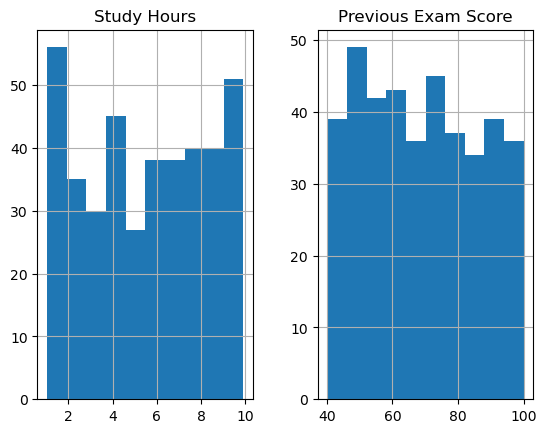

In [33]:
X_train.hist()

In [53]:
rand_forest = Pipeline([('preprocessing', preprocessing),
                                ('random_forest', RandomForestRegressor(random_state=0))])
rand_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('random_forest', RandomForestRegressor(random_state=0))])

In [37]:
rand_rmses = -cross_val_score(rand_forest, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10) 

In [38]:
pd.Series(rand_rmses).describe()

count    10.000000
mean      0.024705
std       0.044327
min       0.000000
25%       0.001581
50%       0.005721
75%       0.025659
max       0.145499
dtype: float64

In [137]:
svr_reg = make_pipeline(preprocessing, SVR())
svr_reg.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('svr', SVR())])

In [42]:
svr_rmses = -cross_val_score(svr_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10) 
pd.Series(svr_rmses).describe()

count    10.000000
mean      0.160234
std       0.013842
min       0.128908
25%       0.154946
50%       0.159325
75%       0.170378
max       0.175444
dtype: float64

In [134]:
log_reg = make_pipeline(preprocessing, LogisticRegression(penalty="l2", max_iter=1000, random_state=0))
log_reg.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=0))])

In [135]:
log_rmses = -cross_val_score(log_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10) 
pd.Series(log_rmses).describe()

count    10.000000
mean      0.352479
std       0.029029
min       0.316228
25%       0.325559
50%       0.353553
75%       0.378862
max       0.387298
dtype: float64

In [80]:
KNN_reg = make_pipeline(preprocessing, KNeighborsClassifier())
KNN_reg.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [81]:
knn_rmses = -cross_val_score(KNN_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10) 
pd.Series(knn_rmses).describe()

/Users/zeinebtekaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zeinebtekaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

count    10.000000
mean      0.047434
std       0.076376
min       0.000000
25%       0.000000
50%       0.000000
75%       0.118585
max       0.158114
dtype: float64

In [48]:
grad_reg = make_pipeline(preprocessing, GradientBoostingClassifier(random_state=0))
grad_reg.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=0))])

In [49]:
grad_rmses = -cross_val_score(grad_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10) 
pd.Series(grad_rmses).describe()

count    10.000000
mean      0.015811
std       0.050000
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.158114
dtype: float64

In [130]:
sgd_reg = make_pipeline(preprocessing, SGDClassifier(penalty="l2", alpha=0.1 , max_iter=1000, eta0=0.01, random_state=42))
sgd_reg.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.1, eta0=0.01, random_state=42))])

In [131]:
sgd_rmses = -cross_val_score(sgd_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10) 
pd.Series(sgd_rmses).describe()

count    10.000000
mean      0.354992
std       0.040566
min       0.273861
25%       0.325559
50%       0.370426
75%       0.387298
max       0.387298
dtype: float64

In [65]:
param_distribs = {'random_forest__max_features': randint(low=0, high=2)}
rnd_search = RandomizedSearchCV(rand_forest, param_distributions=param_distribs, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)


/Users/zeinebtekaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zeinebtekaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zeinebtekaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zeinebtekaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", li

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              Pipeline(steps=[('standardscaler',
                                                               StandardScaler())])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=0))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f95fa5ed970>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [66]:
rnd_search.best_params_

{'random_forest__max_features': 1}

In [67]:
rnd_model = rnd_search.best_estimator_

SVR KNN GRAD

In [68]:
param_distribs = {'svr__kernel': ['linear', 'rbf'],
        'svr__C': loguniform(20, 200_000),
        'svr__gamma': expon(scale=1.0),}
svr_search = RandomizedSearchCV(svr_reg, param_distributions=param_distribs, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
svr_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('standardscaler',
                                                               StandardScaler())])),
                                             ('svr', SVR())]),
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f95fa70fcd0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f9601ffa730>,
                                        'svr__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [69]:
svr_search.best_params_

{'svr__C': 24.17508294611391,
 'svr__gamma': 3.503557475158312,
 'svr__kernel': 'rbf'}

In [75]:
svr_model = svr_search.best_estimator_

In [83]:
param_distribs = {'kneighborsclassifier__n_neighbors': randint(1, 10),
                  'kneighborsclassifier__weights': ['uniform', 'distance'],
                  }
knn_search = RandomizedSearchCV(KNN_reg, param_distributions=param_distribs, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
knn_search.fit(X_train, y_train)

/Users/zeinebtekaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zeinebtekaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('standardscaler',
                                                               StandardScaler())])),
                                             ('kneighborsclassifier',
                                              KNeighborsClassifier())]),
                   param_distributions={'kneighborsclassifier__n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f95fa6ac280>,
                                        'kneighborsclassifier__weights': ['uniform',
                                                                          'distance']},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [84]:
knn_search.best_params_

{'kneighborsclassifier__n_neighbors': 2,
 'kneighborsclassifier__weights': 'distance'}

In [85]:
knn_model = knn_search.best_estimator_

In [99]:
param_distribs = {
    'gradientboostingclassifier__learning_rate': [0.01, 0.03, 0.1, 0.5, 1],
    'gradientboostingclassifier__n_estimators': [50, 100, 200],
    'gradientboostingclassifier__max_depth': [2, 3, 4]
}

grad_search = RandomizedSearchCV(
    grad_reg,
    param_distributions=param_distribs,
    n_iter=10,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

grad_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('standardscaler',
                                                               StandardScaler())])),
                                             ('gradientboostingclassifier',
                                              GradientBoostingClassifier(random_state=0))]),
                   param_distributions={'gradientboostingclassifier__learning_rate': [0.01,
                                                                                      0.03,
                                                                                      0.1,
                                                                                      0.5,
                                                                                      1],
                                        'gradientboostingclassifier__max_depth': [2,
                                         

In [100]:
grad_search.best_params_

{'gradientboostingclassifier__n_estimators': 50,
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__learning_rate': 1}

In [101]:
grad_model = grad_search.best_estimator_

In [105]:
X_test = test_set.drop("Pass/Fail", axis=1)
y_test = test_set["Pass/Fail"].copy()

In [115]:
cross_val_score(knn_model, X_train, y_train, scoring="accuracy")

array([1.    , 0.9875, 1.    , 0.9875, 1.    ])

In [116]:
cross_val_score(grad_model, X_train, y_train, scoring="accuracy")

array([1.    , 0.9875, 1.    , 1.    , 1.    ])

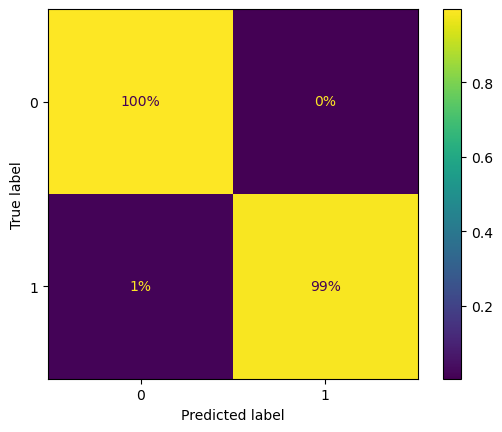

In [119]:
y_train_pred = cross_val_predict(knn_model, X_train, y_train, cv=3) 
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%") 
plt.show()


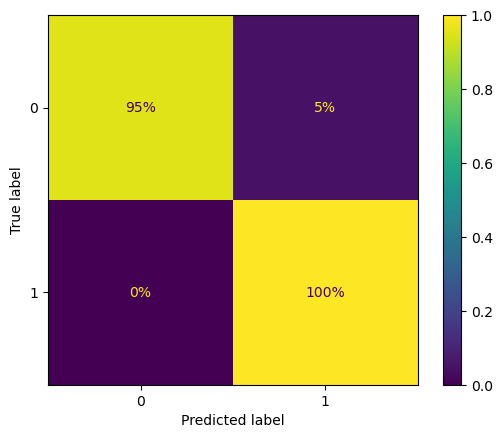

In [121]:
y_test_pred = cross_val_predict(knn_model, X_test, y_test, cv=3) 
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize="true", values_format=".0%") 
plt.show()

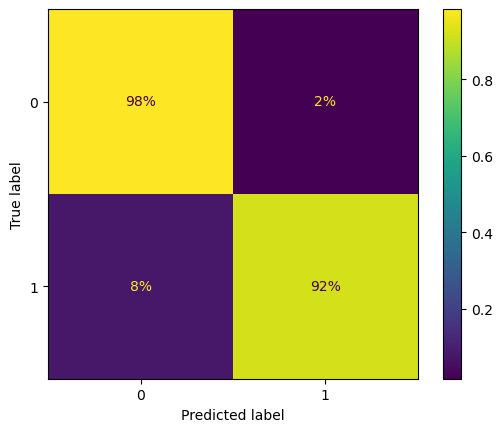

In [122]:
y_test_pred = cross_val_predict(grad_model, X_test, y_test, cv=3) 
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize="true", values_format=".0%") 
plt.show()

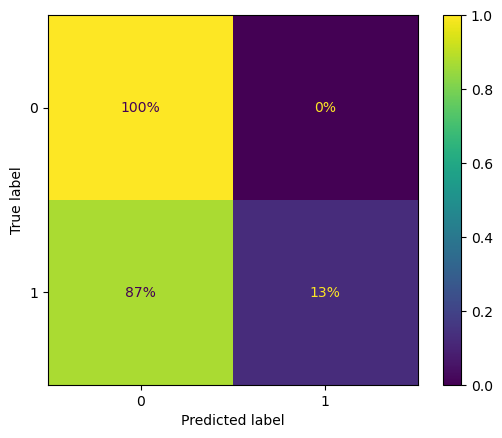

In [125]:
y_test_pred = cross_val_predict(rnd_model, X_test, y_test, cv=3) 
y_test = y_test.astype(int)
y_test_pred = y_test_pred.astype(int)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize="true", values_format=".0%") 
plt.show()

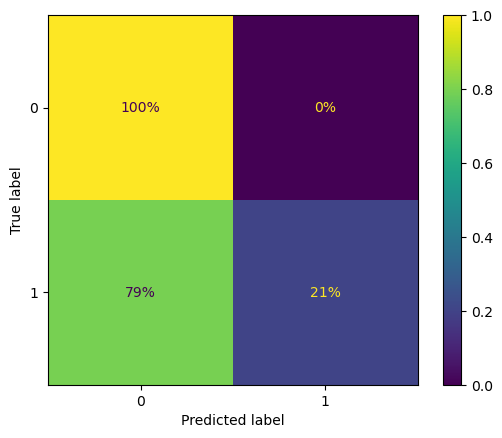

In [126]:
y_test_pred = cross_val_predict(svr_model, X_test, y_test, cv=3) 
y_test = y_test.astype(int)
y_test_pred = y_test_pred.astype(int)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize="true", values_format=".0%") 
plt.show()